##Mobile Price Prediction with Weight Saving

### file uploading

In [7]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("Mobile_Price_Classification-220531-204702.csv")

# Display the first few rows of the dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Import necessary libraries

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### split features and target

In [9]:
X = df.drop("price_range", axis=1)
y = df["price_range"]

### Train-test split (75% training, 25% testing)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Feature scaling

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Build ANN model

In [12]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model

In [14]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5152 - loss: 0.7201 - val_accuracy: 0.6333 - val_loss: 0.6490
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5631 - loss: 0.6744 - val_accuracy: 0.6333 - val_loss: 0.6414
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5915 - loss: 0.6623 - val_accuracy: 0.6533 - val_loss: 0.6376
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5986 - loss: 0.6579 - val_accuracy: 0.6667 - val_loss: 0.6340
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6163 - loss: 0.6534 - val_accuracy: 0.6600 - val_loss: 0.6298
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6343 - loss: 0.6413 - val_accuracy: 0.6533 - val_loss: 0.6264
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6220 - loss: 0.6490 - val_accuracy: 0.6600 - val_loss: 0.6232
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6402 - loss: 0.6296 - val_accuracy: 0.686

### Save the weights

In [15]:
model.save_weights("ann_mobile_price.weights.h5")
print(" Weights saved successfully!")

 Weights saved successfully!


### Evaluate the model

In [16]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"🔍 Test Accuracy: {test_accuracy:.4f}")
print(f"🧮 Test Loss: {test_loss:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6662 - loss: 0.6250 
🔍 Test Accuracy: 0.6600
🧮 Test Loss: 0.6206


### Make Predictions

In [17]:
# Predict probabilities
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Display first 10 predictions
print("Predicted Labels:", y_pred[:10].flatten())
print("Actual Labels:   ", y_test[:10].values)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted Labels: [0 0 0 1 1 0 0 0 1 0]
Actual Labels:    [0 0 1 1 1 1 0 0 1 1]


In [18]:
import pandas as pd

# Display predictions and actual values in a DataFrame
predictions_df = pd.DataFrame({'Predicted': y_pred.flatten(), 'Actual': y_test.values})
print("Predictions vs. Actuals:")
display(predictions_df.head(10))

Predictions vs. Actuals:


,Predicted,Actual
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
5,0,1
6,0,0
7,0,0
8,1,1
9,0,1


### Evaluate Model Performance with Classification Report and Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       252
           1       0.67      0.61      0.64       248

    accuracy                           0.66       500
   macro avg       0.66      0.66      0.66       500
weighted avg       0.66      0.66      0.66       500



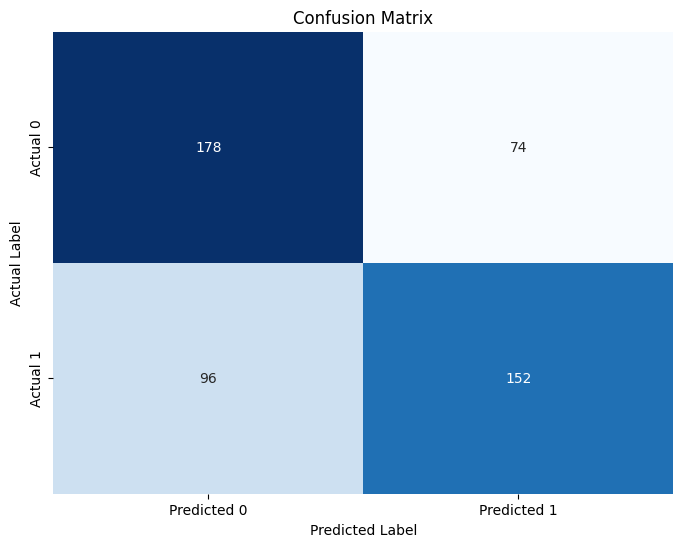

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

## Summery

### Building and evaluating an Artificial Neural Network (ANN) model to predict the price range of mobile phones based on various features.

1. Data Loading: Loading the mobile price classification dataset.

2. Data Preparation: Splitting the data into features (X) and target (y), and then further splitting it into training and testing sets.

3. Feature Scaling: Scaling the features to ensure they are on a similar scale, which is important for ANN models.

4. Model Building: Defining a Sequential ANN model with two dense layers and an output layer for binary classification.

5. Model Compilation: Configuring the model with an Adam optimizer and binary cross-entropy loss.

6. Model Training: Training the model using the scaled training data.

7. Saving Weights: Saving the weights of the trained model.

8. Model Evaluation: Evaluating the model's performance using the test set and displaying the test accuracy and loss.

9. Predictions: Making predictions on the test set and displaying the predicted and actual values.

10. Performance Visualization: Providing a classification report and a confusion matrix to visually assess the model's performance.